# Homework 7




In this week's homework we will work with some questions of probability generally, as well as with the High Time Resolution Universe (HTRU) Pulsar Survey we have seen in lecture.

> The High Time Resolution Universe (HTRU) is an all-sky survey for pulsars and radio transients at a frequency of 1400 MHz.
>
> The Southern Hemisphere is being observed with the Parkes Multi-Beam system, the Northern Hemisphere is being observed with the Effelsberg 7-beam system. It is expected that the survey sensitivity will be similar for  both hemispheres.
>
> These surveys will have a much higher frequency and time resolution than previous surveys like the Parkes Multi-Beam Survey. Because of this, they will suffer much less from dispersive smearing and will therefore be able to detect a much larger number of millisecond pulsars, particularly near the Galactic plane, where we expect the most exciting binary systems and a much larger population of pulsars. These surveys will likely find hundreds of millisecond pulsars, which are great laboratories for the study of fundamental physics, gravitational astronomy and astrophysics in general. Furthermore, the Effelsberg part of the survey (HTRU-North) will survey the whole Northern Hemisphere for the first time in 30 years,allowing a new high-sensitive view onto this part of the sky. The Northern Hemisphere surveys have a great advantage that new discoveries can be followed up with a large variety of radio telescopes, which maximizes scientific output.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.api as sm

pd.options.mode.chained_assignment = None
np.random.seed(206206)

In [3]:
htru = pd.read_csv("./HTRU_2.csv", names =
  ["profile_mean", "profile_sd",
  "profile_excess_kurtosis", "profile_skewness",
  "snr_mean","snr_sd", "snr_excess_kurtosis", "snr_skewness",
  "pulsar"])
print(htru.shape)
htru.columns

(17898, 9)


Index(['profile_mean', 'profile_sd', 'profile_excess_kurtosis',
       'profile_skewness', 'snr_mean', 'snr_sd', 'snr_excess_kurtosis',
       'snr_skewness', 'pulsar'],
      dtype='object')

Recall that **profile** refers to the distribution of radio frequencies recieved at each location in space being measured by the radio telescope, and **snr** refers to the distribution of "signal to noise ratios" (a measure of signal strength) at each location. We don't see the full distribution, but we get summary measures in the form of means, standard deviations, coefficients of skewness and "excess kurtosis" (which we haven't talked about but means how common are extreme values (either small or large)).

We also know whether an observation is a [pulsar](https://en.wikipedia.org/wiki/Pulsar) or not.

## Question 1: Getting to Know the Data

### Q1.a

Create 4 histogram plots for the marginal distributions of

- `profile_mean`
- `profile_sd`
- `snr_mean`
- `snr_sd`

For each plot, briefly note typical values and if you think it exhibits skew (if so, in which direction).

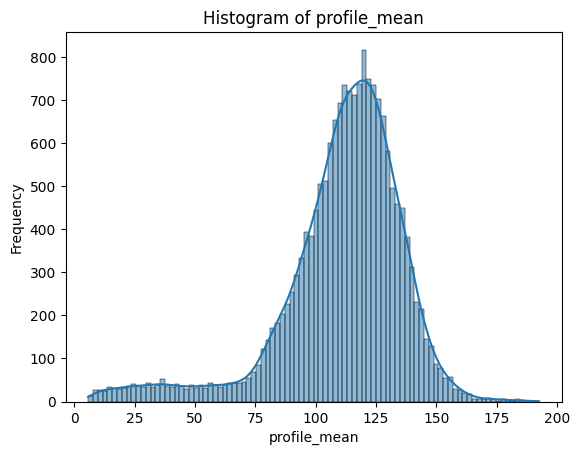

Typical values for each variable (mean and median):
         profile_mean
mean      111.079968
median    115.078125


In [15]:
# profile_mean
# Histograms for marginal distributions
plt.figure()
sb.histplot(htru["profile_mean"], kde=True)
plt.title(f'Histogram of {"profile_mean"}')
plt.xlabel("profile_mean")
plt.ylabel('Frequency')
plt.show()
# Calculating typical values (mean and median) for each variable
typical_values = htru[["profile_mean"]].aggregate(['mean', 'median'])
print("Typical values for each variable (mean and median):\n", typical_values)


The profile_mean tends to have a negative skew.

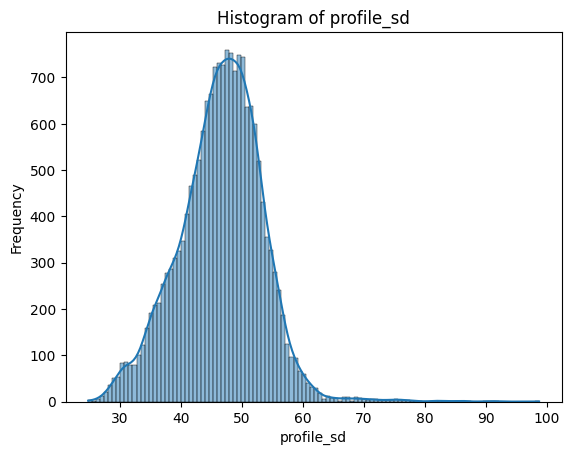

Typical values for each variable (mean and median):
         profile_sd
mean     46.549532
median   46.947479


In [13]:
# profile_sd
plt.figure()
sb.histplot(htru["profile_sd"], kde=True)
plt.title(f'Histogram of {"profile_sd"}')
plt.xlabel("profile_sd")
plt.ylabel('Frequency')
plt.show()
# Calculating typical values (mean and median) for each variable
typical_values = htru[["profile_sd"]].aggregate(['mean', 'median'])
print("Typical values for each variable (mean and median):\n", typical_values)


The profile_sd has a very light positive skew

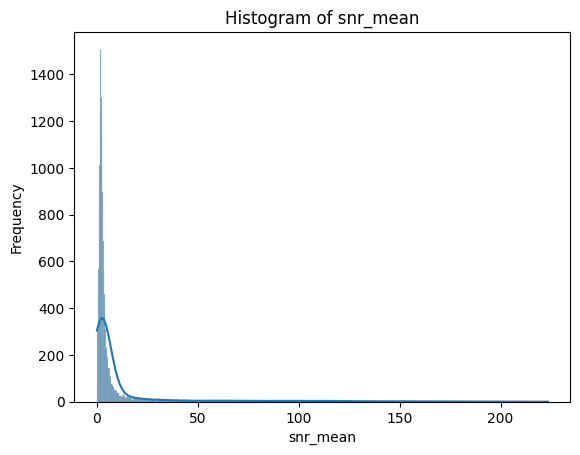

Typical values for each variable (mean and median):
          snr_mean
mean    12.614400
median   2.801839


In [12]:
# snr_mean
plt.figure()
sb.histplot(htru["snr_mean"], kde=True)
plt.title(f'Histogram of {"snr_mean"}')
plt.xlabel("snr_mean")
plt.ylabel('Frequency')
plt.show()
# Calculating typical values (mean and median) for each variable
typical_values = htru[["snr_mean"]].aggregate(['mean', 'median'])
print("Typical values for each variable (mean and median):\n", typical_values)


snr_mean is highly right skewed.

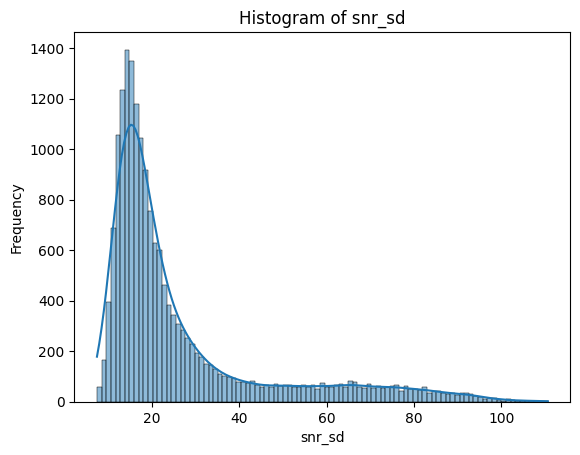

Typical values for each variable (mean and median):
            snr_sd
mean    26.326515
median  18.461316


In [11]:
# snr_sd
plt.figure()
sb.histplot(htru["snr_sd"], kde=True)
plt.title(f'Histogram of {"snr_sd"}')
plt.xlabel("snr_sd")
plt.ylabel('Frequency')
plt.show()
# Calculating typical values (mean and median) for each variable
typical_values = htru[["snr_sd"]].aggregate(['mean', 'median'])
print("Typical values for each variable (mean and median):\n", typical_values)


The snr_sd is right skewed.

### Q1.b

Verify your results for the previous problem by computing means, medians, and coefficients of skewness for each of these 4 variables. Use the [`aggregate` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html) (see the examples at the bottom of this link in particular)  applied to table with only these four columns to compute your results.

Explain why your statements about skew are either supported or not supported by the computed coefficients of skewness.

In [16]:
# answer
# Compute means, medians, and skewness
summary_stats = htru[["profile_mean", "profile_sd", "snr_mean", "snr_sd"]].aggregate(['mean', 'median', 'skew'])
print(summary_stats)


        profile_mean  profile_sd   snr_mean     snr_sd
mean      111.079968   46.549532  12.614400  26.326515
median    115.078125   46.947479   2.801839  18.461316
skew       -1.375188    0.126641   3.683302   1.894254


Based on the summary of means, medians, and skews; my statements about skew are accurately supported by the computer coefficients of skewness.

## Q1.c

At this point, you might be thinking that we should apply transformations to these variables that show extreme skewness. If we were just going to use them by themselves, this would be a good approach, but since we are about to consider differences between pulsars and non-pulsars, it is important to be sure that these skewness issues persist for the **conditional distributions** given pulsar status.

For the most extreme skewness from above, recreate the histogram adding `puslar` as a `hue` visual variable.

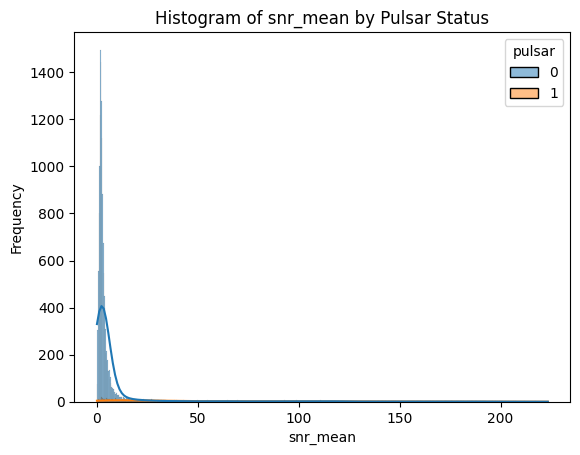

In [20]:
# plot with hue
# Histogram with hue by pulsar status
plt.figure()
sb.histplot(data=htru, x="snr_mean", hue="pulsar", kde=True)
plt.title("Histogram of snr_mean by Pulsar Status")
plt.xlabel("snr_mean")
plt.ylabel("Frequency")
plt.show()




Compute the **conditional coefficient of skewness given pulsar status** (hint: "conditional" means "groupby" when the thing we are conditioning on is nominal). Does the transformation seem necessary now?

In [23]:

conditional_skewness = htru.groupby('pulsar')["snr_mean"].skew()
print("Conditional skewness for snr_mean by pulsar status:\n", conditional_skewness)

Conditional skewness for snr_mean by pulsar status:
 pulsar
0    5.038468
1    0.963258
Name: snr_mean, dtype: float64


## Q1.d

In situations like these, it can sometimes be better to see if there a few observations that are strong skewing the data. Create a table that is just non-pulsars (where `"pulsar"` is 0). Compute the 0.9, 0.95, 0.99 quantiles for the most skewed variable we investigated in the previous part.

In [28]:
# quantiles
non_pulsars = htru[htru["pulsar"] == 0]
quantiles = non_pulsars["snr_mean"].quantile([0.9, 0.95, 0.99])
print("Quantiles for snr_mean in non-pulsars:\n", quantiles)





Quantiles for snr_mean in non-pulsars:
 0.90     10.946656
0.95     40.714298
0.99    145.222508
Name: snr_mean, dtype: float64


Select one of these values and discard all observations in the htru table that exceed this value on the most extreme variable and are also non-pulsars. Call the result `htru_clean` (we will use it in the next section). Recompute the conditional coefficient of skewness to verify this helped. (Hint: remember that `&` means "and", `|` means "or" and `~` means "not" when writing comparisons of pandas columns).

In [27]:
# htru_clean
# Removing extreme values above the 0.95 quantile for non-pulsars
threshold = quantiles[0.95]
htru_clean = htru[~((htru["snr_mean"] > threshold) & (htru["pulsar"] == 0))]

# Check if skew improved
cleaned_skewness = htru_clean.groupby('pulsar')["snr_mean"].skew()
print("Conditional skewness after cleaning:\n", cleaned_skewness)

Conditional skewness after cleaning:
 pulsar
0    4.228518
1    0.963258
Name: snr_mean, dtype: float64


## Question 2: Differences of Pulsars and Non-Pulsars

This problem will use the `htru_clean` table from the previous problem. If you are having problems creating that table, you may use the `htru` table but will receive a 2 point deduction on your final score.


### Q2.a

For pulsars and non-pulsars, compute conditional means on the 4 variables of interest from the last section ("pulsar_mean", "pulsar_sd", "snr_mean", "snr_sd") *simulateously* such that
you get two rows (one for pulsars, one for non-pulsars) with a column for each  variable's sample mean. Then use the .transpose() method to swap the rows and columns so that you get two columns and 4 rows. Save this to a variable (I will call mine `pnp_means`).

Repeat  with the `.var()` method, saving to a different variable (I will call mine `pnp_vars`).

Repeat again with the `.count()` to get the sample sizes (I will call mine `pnp_ns`). In this particular case all the values will be the same in each column, but this is a smart move in case there is missing data for some variables but not others.

Print out all tables for verification by the graders.

In [29]:
# conditional means, variances, counts
pnp_means = htru_clean.groupby("pulsar")[["profile_mean", "profile_sd", "snr_mean", "snr_sd"]].mean().transpose()
pnp_vars = htru_clean.groupby("pulsar")[["profile_mean", "profile_sd", "snr_mean", "snr_sd"]].var().transpose()
pnp_ns = htru_clean.groupby("pulsar")[["profile_mean", "profile_sd", "snr_mean", "snr_sd"]].count().transpose()

print("Conditional Means:\n", pnp_means)
print("Conditional Variances:\n", pnp_vars)
print("Sample Sizes:\n", pnp_ns)


Conditional Means:
 pulsar                 0          1
profile_mean  116.173782  56.690608
profile_sd     47.061499  38.710598
snr_mean        3.838763  49.825995
snr_sd         20.322037  56.468963
Conditional Variances:
 pulsar                 0            1
profile_mean  285.233535   900.462475
profile_sd     34.805553    64.538959
snr_mean       21.027717  2050.996744
snr_sd        105.465898   389.315505
Sample Sizes:
 pulsar            0     1
profile_mean  15446  1639
profile_sd    15446  1639
snr_mean      15446  1639
snr_sd        15446  1639


### Q2.b

For each variable, you can compute the difference of means simultaneously with `pnp_means[1] - pnp_means[0]`.

For each variable you can compute the **pooled standard deviation** by

1. Multiply the `pnp_vars` by `pnp_ns`.
2. Sum the that result using `.sum(axis = 1)`
3. Divide that value by the `.sum(axis = 1)` of the `pnp_ns`.
3. Use `np.sqrt` on the result.

Divide the differences by the pooled standard deviations to get effect size differences comparing pulsars and non-pulsars. Interpret these results using the able of effect sizes and clearly state which group has the large value for each variable.

Effect size magnitude )
* Very small: 0 - 0.01
* Small: 0.1 - 0.20
* Medium: 0.2 - 	0.50
* Large: 0.5 - 	0.80
* Very large: 0.8 0- 	1.20
* Huge: 1.2 - 	2.0+

In [30]:
# effect sizes
# Differences of means
mean_diffs = pnp_means[1] - pnp_means[0]

# Pooled standard deviations
pooled_vars = (pnp_vars * pnp_ns).sum(axis=1) / pnp_ns.sum(axis=1)
pooled_stds = np.sqrt(pooled_vars)

# Effect sizes
effect_sizes = mean_diffs / pooled_stds
print("Effect Sizes:\n", effect_sizes)


Effect Sizes:
 profile_mean   -3.205936
profile_sd     -1.360834
snr_mean        3.130724
snr_sd          3.137922
dtype: float64


## Question 3: Probability of Being a Pulsar

For this question, we will continue to use the `htru_clean`. If you used `htru` on the previous problem, there will be no additional penalty for using `htru` on this problem.

### Q3.a

Recall that the `pulsar` column is coded as "1" is a pulsar, "0" is a non-pulsar. What is the proportion of observations are pulsars? Compute this value using a single method call on the `htru_clean["pulsar"]` column.

In [31]:
# proportion 
pulsar_proportion = htru_clean["pulsar"].mean()
print("Proportion of Pulsars:", pulsar_proportion)


Proportion of Pulsars: 0.09593210418495757


## Q3.b

Using the `pd.qcut` function, create a new column in `htru_clean` that represents which *decile of `profile_mean`* each observation falls into (i.e., make the first argument the `"profile_mean"` column and the second argument 10). Save the result to a new column (I will call mine `pm_decile`).

Compute the **conditional proportion of observations that are pulsars** for each level of `pm_decile` (this is a time when `.reset_index()` will be useful).

Use the supplied `get_mid` function to turn the `pm_decile` column in your result into a value that represents the mid-point of the intervals we got from `qcut`, saving the result as a new column in the able (call it `pm_mid`).


Plot `pm_mid` on the horizontal axis and the proportion of pulsars on the veritcal axis as a line plot. Comment on what you see. What happens to the percentage of objects that are pulsars as the typical radio frequency increases.


/tmp/ipykernel_6219/1470276010.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  htru_clean.groupby('pm_decile')['pulsar']


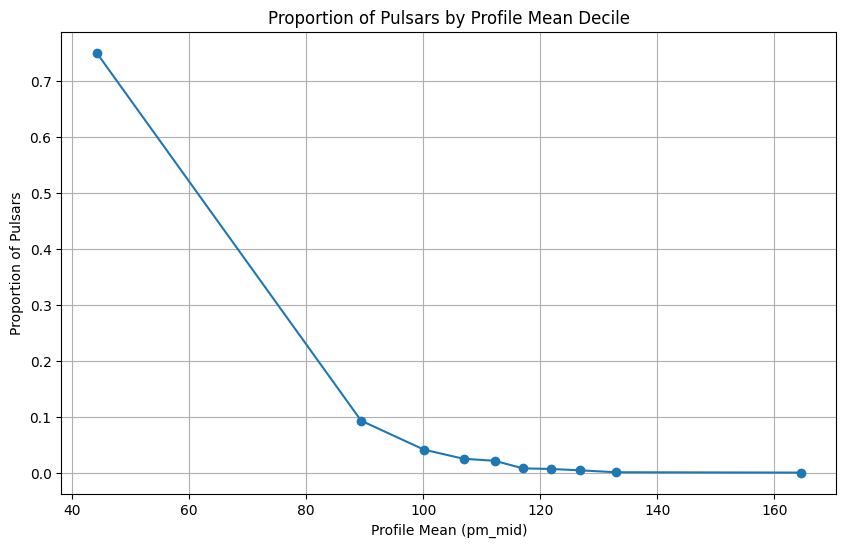

In [34]:
# Use pd.qcut to create deciles for profile_mean and store in a new column 'pm_decile'
htru_clean['pm_decile'] = pd.qcut(htru_clean['profile_mean'], 10)

# Calculate the proportion of observations that are pulsars for each decile
pulsar_proportion_by_decile = (
    htru_clean.groupby('pm_decile')['pulsar']
    .mean()
    .reset_index(name='pulsar_proportion')
)

# Get midpoints of each interval in the 'pm_decile' column and add as 'pm_mid'
pulsar_proportion_by_decile['pm_mid'] = pulsar_proportion_by_decile['pm_decile'].apply(lambda interval: (interval.left + interval.right) / 2)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(pulsar_proportion_by_decile['pm_mid'], pulsar_proportion_by_decile['pulsar_proportion'], marker='o', linestyle='-')
plt.xlabel('Profile Mean (pm_mid)')
plt.ylabel('Proportion of Pulsars')
plt.title('Proportion of Pulsars by Profile Mean Decile')
plt.grid()
plt.show()



### Q3.c

Of course, it would be nice to avoid having to break up `profile_mean` into a set of discrete groups. Instead, we can perform linear regression with `pulsar` as $Y$ and `profile_mean` as $X$. Recall that linear regression is attempting to model the **conditional mean** of $Y$ given $X$. Since a proportion is a special case of a mean when $Y$ is 0 or 1, and proportions are *empirical probabilities*, this approach is called a "linear probability model".

Compute the linear regression regression with `pulsar` as $Y$ and `profile_mean` as $X$. Do not forget to add the constant term. Print out the result.

According to this model:
- What does the sign of the coefficient indicate?
- What is the probability that an observation with a `profile_mean` 120 would be a pulsar?
- What is the probability that an observation with a `profile_mean`of 60 would be a pulsar?
- For two groups of observations that differ by 100 units on `pulsar_mean`, what would be the difference in proportions of pulsars? Which group would have a higher proportion of pulsars?

In [35]:
# solution
# Linear regression with pulsar as Y and profile_mean as X
X = sm.add_constant(htru_clean["profile_mean"])
Y = htru_clean["pulsar"]
model = sm.OLS(Y, X).fit()
print(model.summary())

# Probability predictions
profile_mean_120 = model.predict([1, 120])[0]
profile_mean_60 = model.predict([1, 60])[0]
print(f"Predicted probability of being a pulsar for profile_mean = 120: {profile_mean_120}")
print(f"Predicted probability of being a pulsar for profile_mean = 60: {profile_mean_60}")

# Probability difference for a 100-unit change
prob_diff_100 = model.params["profile_mean"] * 100
print(f"Difference in pulsar proportion for 100-unit difference in profile_mean: {prob_diff_100}")


                            OLS Regression Results                            
Dep. Variable:                 pulsar   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                 1.523e+04
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:58:07   Log-Likelihood:                 2088.7
No. Observations:               17085   AIC:                            -4173.
Df Residuals:                   17083   BIC:                            -4158.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.9713      0.007    133.426   

1: The sign of the coefficent show whether we have a positive or negative linear relationship, in this case we have a negative relationship.


2:For profile_mean = 120, the predicted probability is approximately 0.0204, indicating a very low likelihood of the observation being a pulsar at this level of profile_mean.


3: For profile_mean = 60, the predicted probability is approximately 0.4958, close to a 50% likelihood of being a pulsar. This suggests that the probability of being a pulsar is much higher at lower profile_mean values, which aligns with the negative slope.


4:For a 100-unit increase in profile_mean, the probability of being a pulsar decreases by 100 * 0.0079 = 0.79
100 * −0.0079 = −0.79. This means that with a 100-unit increase in profile_mean, the predicted probability of being a pulsar is reduced by about 79%.